# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# 1 
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
# load rankings data steel
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
# load rankings data wood
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

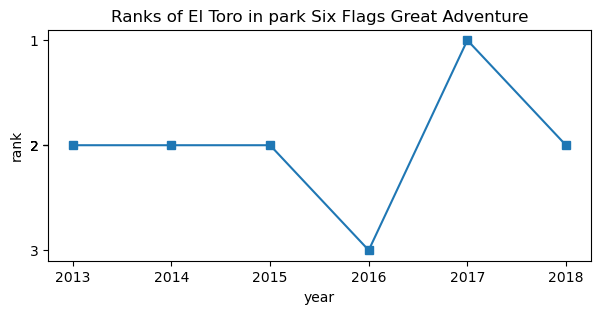

<Figure size 640x480 with 0 Axes>

In [2]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_rank(name, park, df):
    years = df.loc[(df.Name == name) & (df.Park == park),'Year of Rank']
    ranks = df.loc[(df.Name == name) & (df.Park == park),'Rank']
    fig, ax = plt.subplots(figsize=(7,3))
    ax.plot(years,ranks,marker='s')
    ax.set(title=f'Ranks of {name} in park {park}',
           xlabel='year',ylabel='rank')
    ax.set_yticks(ranks.values)
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    
# Create a plot of El Toro ranking over time
plot_rank('El Toro','Six Flags Great Adventure',wood)

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

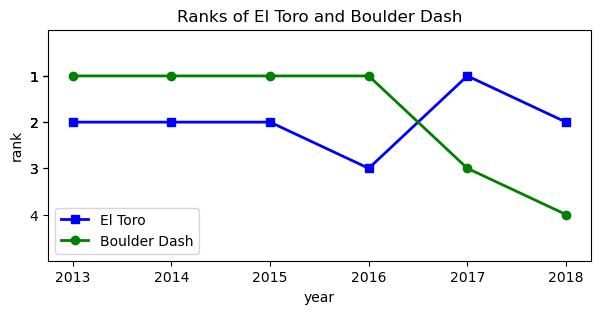

In [3]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_2ranks(name1, name2, park1, park2, df):
    years1 = df.loc[(df.Name == name1) & (df.Park == park1),'Year of Rank']
    ranks1 = df.loc[(df.Name == name1) & (df.Park == park1),'Rank']
    years2 = df.loc[(df.Name == name2) & (df.Park == park2),'Year of Rank']
    ranks2 = df.loc[(df.Name == name2) & (df.Park == park2),'Rank'].to_list()
    allranks = list(ranks1) + list(ranks2)
    ymax = max(allranks)+1
    fig, ax = plt.subplots(figsize=(7,3))
    ax.plot(years1,ranks1,color='blue',label=name1,linewidth=2,marker='s')
    ax.plot(years2,ranks2,color='green',label=name2,linewidth=2,marker='o')
    ax.set(title=f'Ranks of {name1} and {name2}',ybound=(0,ymax),
           xlabel='year',ylabel='rank')
    ax.set_yticks(allranks)
    ax.invert_yaxis()
    ax.legend(loc='best')
    plt.show()
    
# Create a plot of El Toro and Boulder Dash roller coasters
plot_2ranks('El Toro','Boulder Dash','Six Flags Great Adventure','Lake Compounce',wood)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

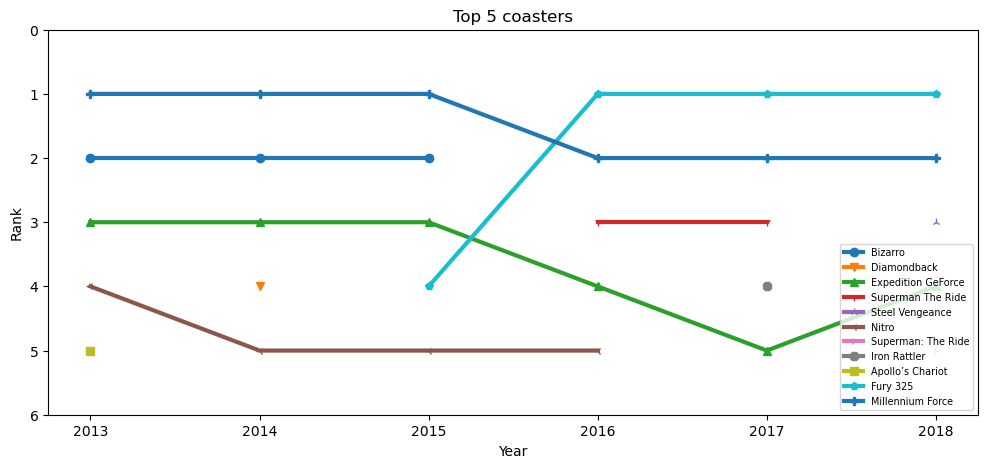

<Figure size 640x480 with 0 Axes>

In [4]:
# 4
# Create a function to plot top n rankings over time
def plot_nranks(df,n):
    top_ranks = df.loc[df.Rank<=n,['Name','Park','Year of Rank','Rank']]
    fig, ax = plt.subplots(figsize=(12,5))
    markers = 'ov^12348spP*hH+x'
    i=0 #index to marker to be used
    for coaster in set (top_ranks.Name.values):
        years = top_ranks.loc[top_ranks.Name == coaster,'Year of Rank']
        ranks = top_ranks.loc[top_ranks.Name == coaster,'Rank']
        ax.set_yticks(range(10))
        ax.plot(years, ranks, label = coaster,linewidth=3,marker=markers[i])
        i += 1
    ax.invert_yaxis()
    ax.set(title='Top {} coasters'.format(n),xlabel='Year',ylabel='Rank',
          ybound=(0,6))
    ax.legend(loc=4,fontsize='x-small')
    plt.show()
    plt.clf()
# Create a plot of top n rankings over time
plot_nranks(steel,5)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [5]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

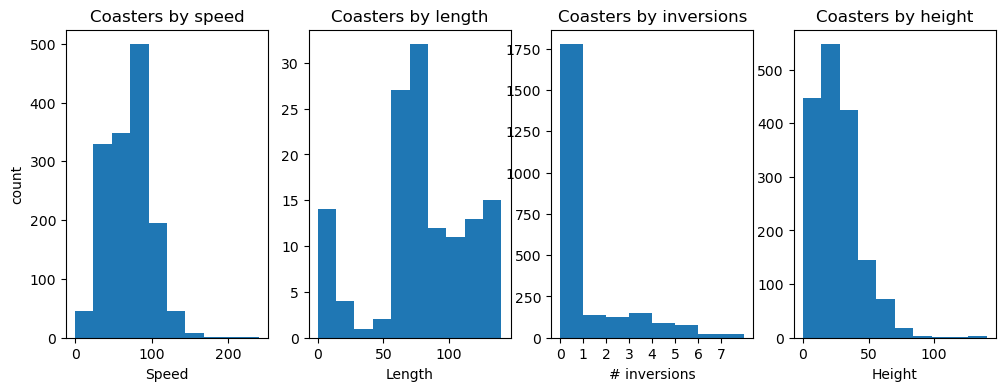

In [6]:
# 6
# Create a function to plot histogram of column values
def plot_hist(df):
    fig,axs=plt.subplots(1,4,figsize=(12,4))
# Create histogram of roller coaster speed
    axs[0].hist(df.speed)
    axs[0].set(title='Coasters by speed',xlabel='Speed',ylabel='count')
# Create histogram of roller coaster length
    axs[1].hist(df.length,range=(0,140),bins=10)
    axs[1].set(title='Coasters by length',xlabel='Length')
# Create histogram of roller coaster number of inversions
    axs[2].hist(df.num_inversions,range=(0,8),bins=8)
    axs[2].set(title='Coasters by inversions',xlabel='# inversions',xticks=range(8))
# Create a function to plot histogram of height values
    axs[3].hist(df.height,range=(0,140),bins=10)
    axs[3].set(title='Coasters by height',xlabel='Height')
# Create a histogram of roller coaster height

    plt.show()

plot_hist(roller_coasters)


7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

<function __main__.inversions(df1, park1)>

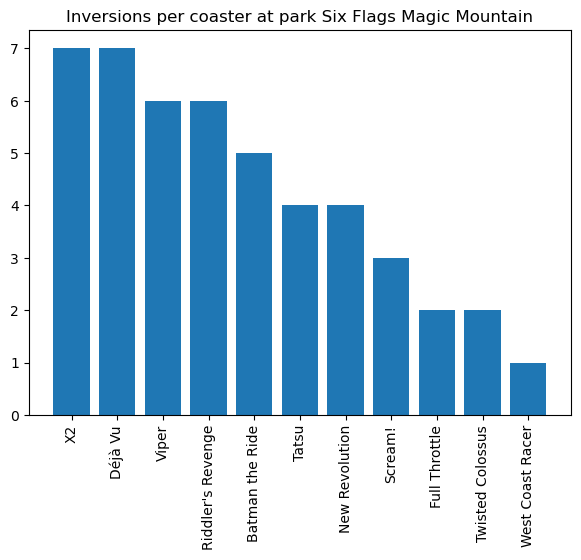

In [15]:
# 7
# Create a function to plot inversions by coaster at park
def inversions(df1,park1):
    park = df1.loc[(df1.park==park1) & (df1.num_inversions > 0)]
    labels = park.name
    x, y_heights = range(len(labels)), park.num_inversions.sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.set(title='Inversions per coaster at park {}'.format(park1))
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=90)
    ax.bar(x,y_heights)
    return inversions
# Create barplot of inversions by roller coasters
inversions(roller_coasters,'Six Flags Magic Mountain')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

Operating: 2172 closed: 439


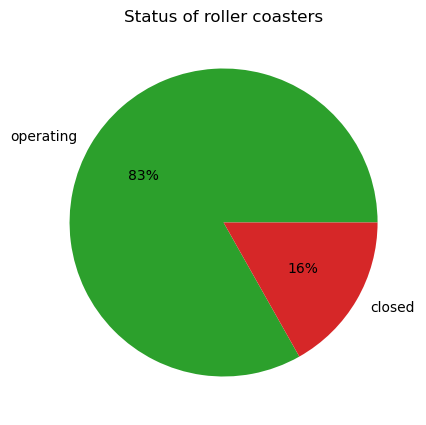

<Figure size 640x480 with 0 Axes>

In [24]:
# 8
# Create a function to plot a pie chart of status.operating
def status(df2):
    status = df2.groupby('status').name.count()
    operating = status['status.operating']
    closed = status['status.closed.definitely']
    print('Operating: {} closed: {}'.format(operating,closed))
    fig, ax1 = plt.subplots(figsize=(7,5))
    ax1.pie([operating,closed],labels=['operating','closed'],colors=['tab:green','tab:red'],autopct='%d%%')
    ax1.set(title='Status of roller coasters')
    plt.show()
    plt.clf()
    
# Create pie chart of roller coasters
status(roller_coasters)

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

In [9]:
roller_coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


Since we have null values in numerical columns, we get rid of them using dropna() method:

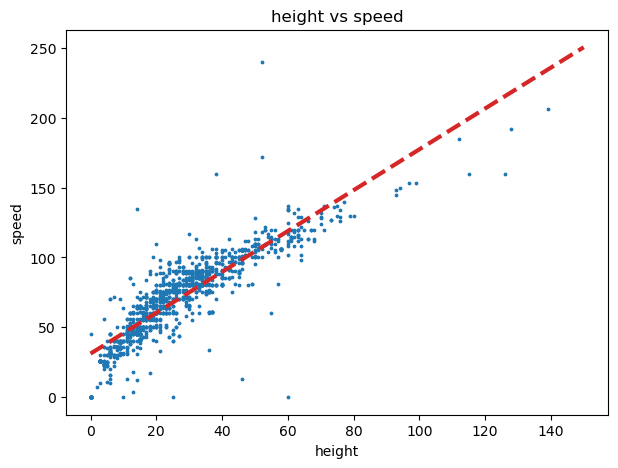

<Figure size 640x480 with 0 Axes>

In [10]:
# 9
# Create a function to plot scatter of any two columns
from numpy.polynomial.polynomial import polyval, polyfit
def plot_scatter(df0,col_x,col_y,range1):
    df1=df0.dropna(axis=0,subset=[col_x,col_y])
    x = df1.loc[df1[col_x]<range1[1],col_x]
    y = df1.loc[df1[col_x]<range1[1],col_y]
    #plt.style.use('ggplot')
    fig, ax0 = plt.subplots(figsize=[7,5])
    model = polyfit(x,y,1)
    y_model = polyval(range1,model)
    ax0.scatter(x,y,s=3,color='tab:blue')
    ax0.set(xlabel=col_x,ylabel=col_y,title = '{} vs {}'.format(col_x,col_y),
           xbound=range1)
    ax0.plot(range1,y_model,color='tab:red',linewidth=3,linestyle='--')
    plt.show()
    plt.clf()

# Create a scatter plot of roller coaster height by speed

plot_scatter(roller_coasters,'height','speed',range1=(0,150))

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

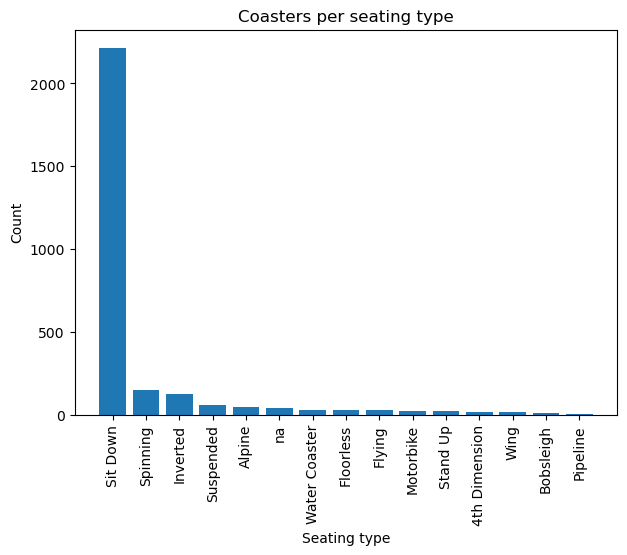

In [11]:
def seating_type(df1):
    seatings = df1.groupby('seating_type').name.count().sort_values(ascending=False)
    x, y_heights = range(len(seatings)), seatings.values
    fig, ax = plt.subplots(figsize=(7,5))
    ax.set(title='Coasters per seating type',xlabel='Seating type',ylabel='Count')
    ax.set_xticks(x)
    ax.set_xticklabels(seatings.index,rotation=90)
    ax.bar(x,y_heights)  
seating_type(roller_coasters)

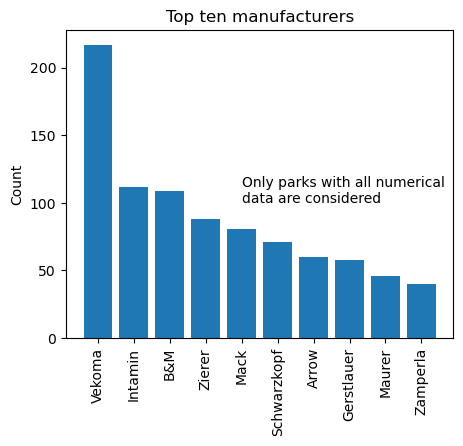

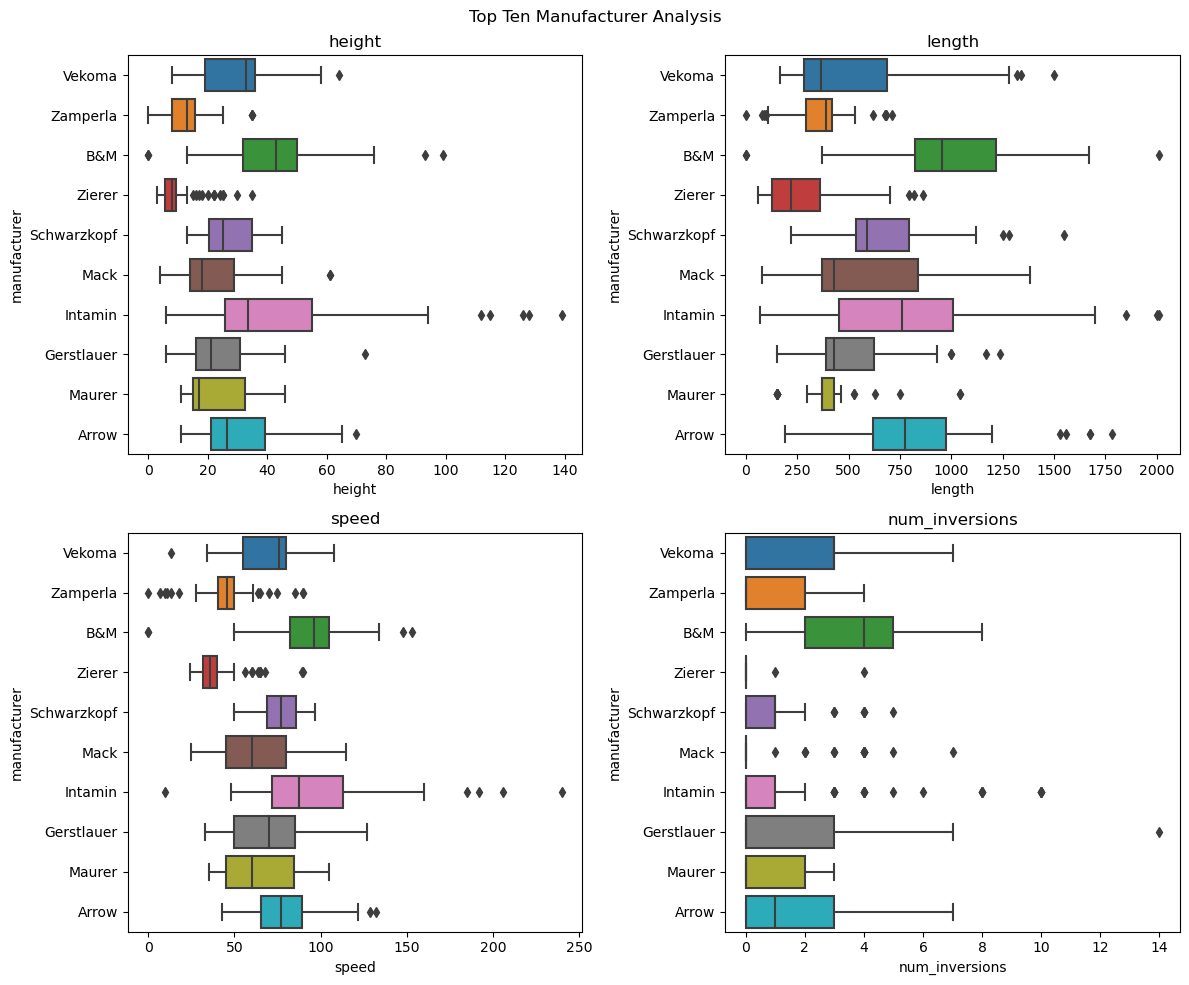

In [23]:
import seaborn as sns
import numpy as np
def makers(df0):
    df1 = df0.loc[df0.manufacturer != 'na']
    df2 = df1.dropna(subset=['name','height', 'length', 'speed', 'num_inversions'])
    top_manufacturers = df2.manufacturer.value_counts().sort_values(ascending=False)[:10]
    df2 = df2.loc[roller_coasters.manufacturer.isin(top_manufacturers.index)]
    fig1,ax1 = plt.subplots(figsize=(5,4),sharey=True)
    ax1.set(title='Top ten manufacturers',ylabel='Count')
    ax1.annotate('Only parks with all numerical \ndata are considered',xy=(4,100))
    ax1.set_xticks(range(len(top_manufacturers)))
    ax1.set_xticklabels(top_manufacturers.index,rotation=90)
    ax1.bar(range(len(top_manufacturers)),height=top_manufacturers)
    fig2, axs = plt.subplots(2,2,figsize=(12,10))
    fig2.suptitle('Top Ten Manufacturer Analysis')
    cols =[['height', 'length'], ['speed', 'num_inversions']]
    for ind, col in np.ndenumerate(cols):
        axs[ind].set_title(col)
        #axs[ind].set_xticklabels(rotation=90)
        sns.boxplot(ax=axs[ind],y=df2.manufacturer,x=df2[col])
    plt.tight_layout()
        
makers(roller_coasters)

## Solution

Great work! Visit [our forums](https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378) or the file **Roller Coaster_Solution.ipynb** to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.